In [1]:
limit = 100

In [2]:
import math

class Zipf:
    def __init__(self):
        self.hasInit = False

    def init(self, n, theta):
        self.hasInit = True
        self.n_ = n
        self.theta_ = theta
        self.alpha_ = 1.0 / (1.0 - theta)
        self.zetan_ = self.zeta(n)
        self.eta_ = (1.0 - math.pow(2.0 / n, 1.0 - theta)) / (1.0 - self.zeta(2) / self.zetan_)

    def value(self, u):
        assert self.hasInit, "Not initialized"
        uz = u * self.zetan_
        if uz < 1:
            v = 0
        elif uz < 1 + math.pow(0.5, self.theta_):
            v = 1
        else:
            v = int(self.n_ * math.pow(self.eta_ * u - self.eta_ + 1, self.alpha_))
        assert v >= 0 and v < self.n_, "Value out of range"
        return v

    def zeta(self, n):
        assert self.hasInit, "Not initialized"
        sum = 0
        for i in range(1, n+1):
            sum += math.pow(1.0 / i, self.theta_)
        return sum

globalZipf = Zipf()
globalZipf.init(limit, 0.9)

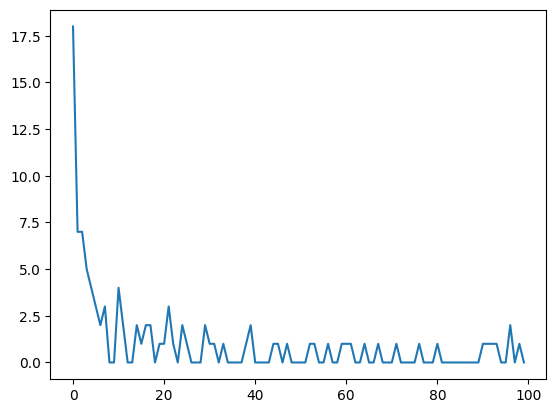

In [3]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

values = []

for i in range(limit):
    values.append(globalZipf.value(random.random()))

data = pd.DataFrame({
    "key": list(range(limit)),
    "count": [values.count(i) for i in range(limit)]
})

plt.plot(data["key"], data["count"])

In [4]:
exec('print("Hello World")')

Hello World
